In [1]:
import tensorflow as tf
import numpy as np

In [2]:
max_features = 20000
embedding_len = 128
sequence_length = 500

# 1. Data

In [3]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=sequence_length)

# 2. Model: CNN

In [8]:
# A integer input for vocab indices.
inputs = tf.keras.Input(shape=(sequence_length,), dtype="int64")

x = tf.keras.layers.Embedding(max_features, embedding_len)(inputs)
x = tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = tf.keras.layers.Flatten()(x)
dense1 = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")(dense1)

model = tf.keras.Model(inputs, predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 500, 128)          2560000   
                                                                 
 conv1d_4 (Conv1D)           (None, 165, 128)          114816    
                                                                 
 flatten_4 (Flatten)         (None, 21120)             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              21627904  
                                                                 
 predictions (Dense)         (None, 1)                 1025      
                                                                 
Total params: 24,303,745
Trainable params: 24,303,745
Non-t

# 3. Training

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
391/391 [==============================] - 128s 325ms/step - loss: 0.3364 - accuracy: 0.8451 - val_loss: 0.2647 - val_accuracy: 0.8912
Epoch 2/10
391/391 [==============================] - 129s 331ms/step - loss: 0.0799 - accuracy: 0.9732 - val_loss: 0.4429 - val_accuracy: 0.8617
Epoch 3/10
391/391 [==============================] - 127s 326ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.5880 - val_accuracy: 0.8666
Epoch 4/10
391/391 [==============================] - 129s 330ms/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.7051 - val_accuracy: 0.8659
Epoch 5/10
391/391 [==============================] - 126s 322ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.7276 - val_accuracy: 0.8607
Epoch 6/10
391/391 [==============================] - 122s 313ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.6168 - val_accuracy: 0.8600
Epoch 7/10
391/391 [==============================] - 122s 313ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.8573 -

<Figure size 1000x1000 with 0 Axes>

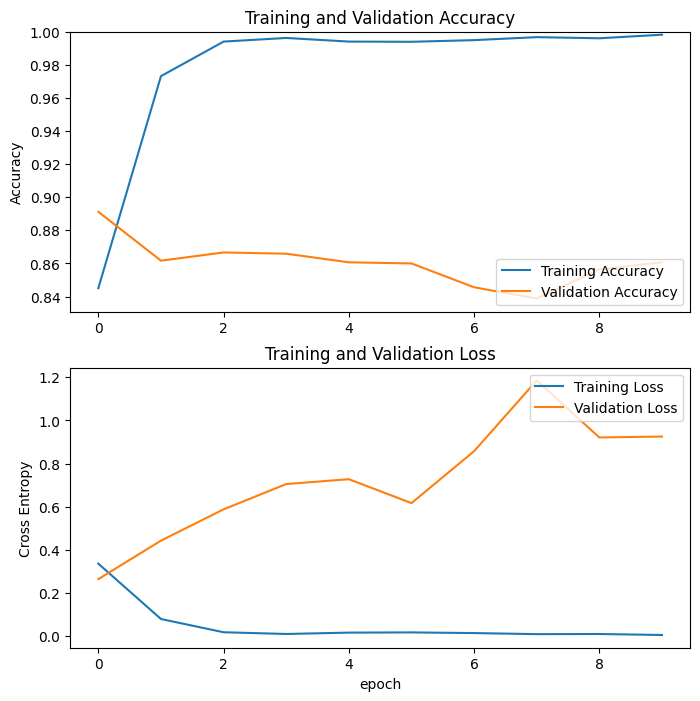

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()